In [8]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('./img/girl.jpg')
rows, cols = img.shape[:2]

In [4]:
# 뒤집기 변환행렬로 구현
st = time.time()
mflip = np.float32([[-1, 0, cols-1], [0, -1, rows-1]])  # 변환행렬 생성
fliped1 = cv2.warpAffine(img, mflip, (cols, rows))      # 변환 적용
print('matrix:', time.time()-st)

matrix: 0.0017158985137939453


In [5]:
# remap 함수로 뒤집기 구현
st2 = time.time()
mapy, mapx = np.indices((rows, cols), dtype=np.float32)  # 매핑 배열 초기화 생성
mapx = cols - mapx - 1                                   # x축 좌표 뒤집기 연산
mapy = rows - mapy - 1                                   # y축 좌표 뒤집기 연산
fliped2 = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)   # remap 적용
print('remap:', time.time()-st2)

remap: 0.010727167129516602


In [6]:
# # 결과 출력
# cv2.imshow('origin', img)
# cv2.imshow('fliped1', fliped1)
# cv2.imshow('fliped2', fliped2)
# cv2.waitKey()
# cv2.destroyAllWindows()

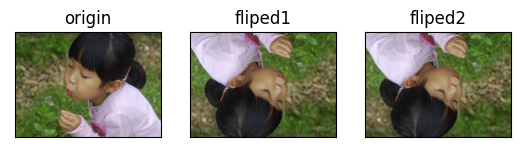

In [9]:
# 결과 출력
imgs = {'origin':img, 'fliped1':fliped1, 'fliped2':fliped2}

for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([])
    plt.yticks([])

plt.show()